<a href="https://colab.research.google.com/github/songiangvn/AI-Machine-Learning-for-Coders/blob/main/Chapter_3_1_Going_Beyond_the_Basics_Detecting_Features_in_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 3: Going Beyond the Basics: Detecting Features in Images

Chương này khá dài nên mình sẽ tổng quan trước những cái mới mà chúng mình sẽ học nha:

- Cách sử dụng **phương pháp tích chập** để trích xuất các đặc trưng trong ảnh. Thông qua đó, ta hiểu được cách sử dụng các lớp tích chập (**Convolution layer**) để tăng hiệu quả học các bức ảnh. Thêm đó là phần **lớp gộp (Pooling layer)** giúp giảm thiểu số lượng tính toán, tuy nhiên vẫn giữ được các đặc trưng chính.
- Phương pháp gia tăng thêm dữ liệu (**augmentation**) giúp làm giàu kho dữ liệu hơn, tăng dữ liệu trong quá trình huấn luyện giúp cải thiện mô hình.
- Phương pháp học chuyển giao (**transfer learning**) giúp mô hình có thể tận dụng lại những kiến thức đã học được trước đó.
- Ngoài ra, chúng mình cũng sẽ ôn lại về phân loại đa lớp (**multi-class classification**) cũng như tìm hiểu sơ qua về phương pháp loại bỏ ngẫu nhiên (**dropout**) giúp cải thiện mô hình, tránh được tình trạng quá khớp (overfitting).

# Convolutions

Từ ví dụ từ chapter 2 có thể thấy rằng, phương pháp ở chapter 2 có rất nhiều hạn chế từ việc phải trải phẳng hình ảnh ra, ở dữ liệu fashion_mnist thì chỉ đơn giản là ảnh trắng đen, tức một màu mà khi trải ra số lượng giá trị tuy cũng lớn nhưng mà kiến thức thu được chỉ ở dạng tổng quan hình ảnh mà chúng ta nhìn thấy. Nếu với ảnh màu tức 3 kênh màu (đỏ, xanh, lam) thì việc này sẽ khó khăn đến thế nào để có thể phân biệt được khi chúng ta chỉ nhìn từ một hướng hay một khía cạnh đặc trưng của chúng.

> *Liệu có một phương pháp nào đó để ta có thể phân tích sâu hơn các bức ảnh không? Như kiểu chia bức ảnh ra thành các đối tượng nhỏ hơn để có thể phân tích sâu hơn các khía cạnh.*

=> Sử dụng phương pháp convolutions

> Phương pháp **tích chập** trong học máy là sử dụng các **bộ lọc (filters)** để nhìn hình ảnh dưới nhiều **góc độ và đặc điểm** khác nhau, từ đó mô hình có thể học được nhiều thông tin hơn.

Ví dụ:
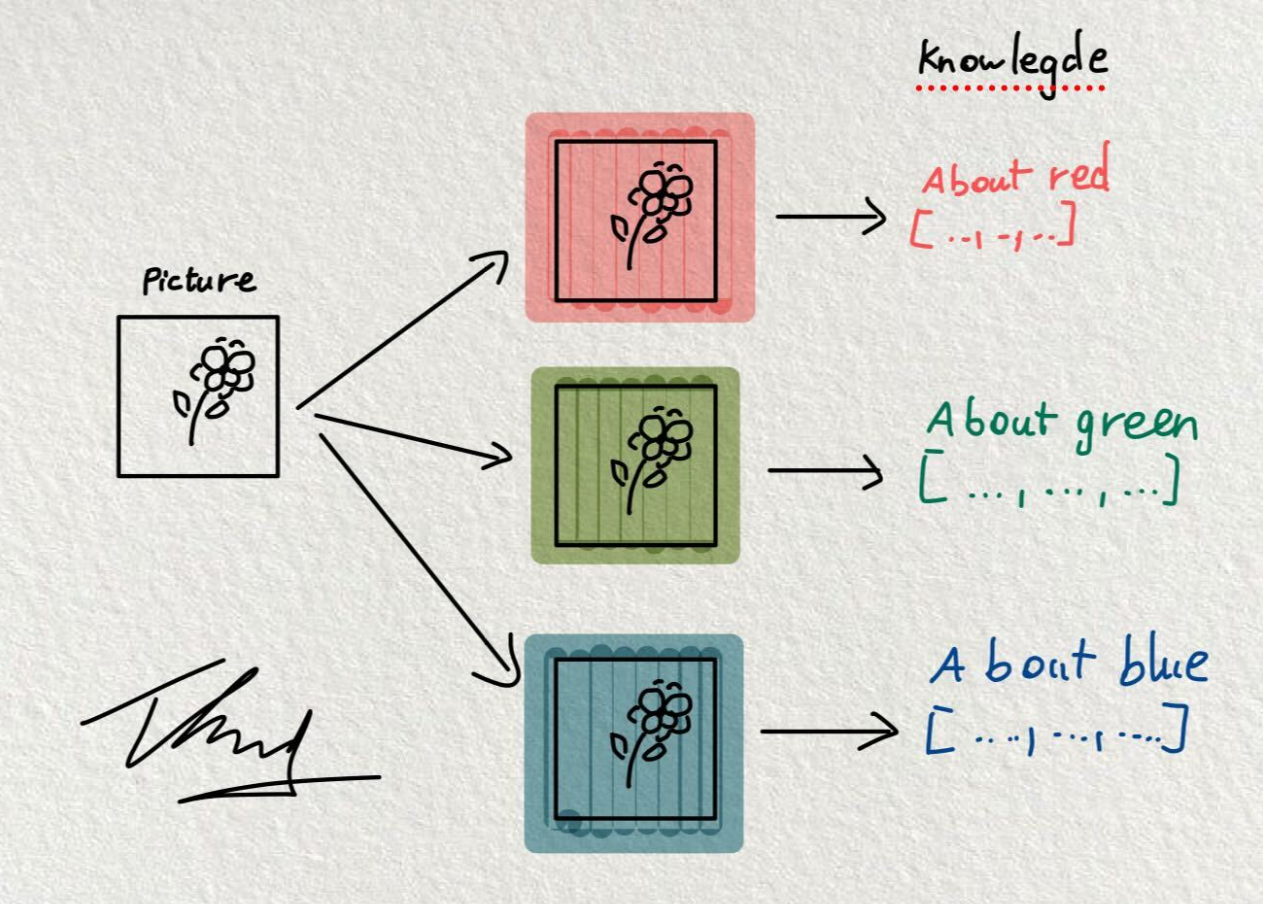




Ở đây mình có một bức ảnh và 3 miếng giấy bóng kính với 3 màu đỏ, xanh, lam. Thì khi mình chồng chúng lên bức ảnh để nhìn thi mình sẽ thấy được bức hình với các màu sắc khác nhau hơn từ đó thu được nhiều dữ liệu hơn.

> *Ta có thể nói giấy bóng kính chính là các bộ lọc của lớp tích chập*.

## Ví dụ hình ảnh từ bộ dữ liệu fashion mnist sau khi đi qua Convolution Layer

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
(train_imgs, train_labels), (test_imgs, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D
import numpy as np

img = train_imgs[0]
print("Kích thước ảnh mặc định: ", img.shape)

img = img / 255.0 # normalize

# Chuyển kiểu sang numpy array để add vào layer cho tiện
img_arr = np.array(img)

# Ở đây chúng ta sẽ thực hiện một bước nhỏ để chỉ định lại kích thước ảnh,
# thêm số để chỉ định số lượng kênh màu, với ảnh trắng đen thì là 1
img_reshape = img.reshape(1, 28, 28, 1) # số 1 đầu tiên là số mẫu, số 1 ở cuối là số kênh màu

print("Kích thước ảnh sau khi được chuẩn hóa: ", img_reshape.shape)

Kích thước ảnh mặc định:  (28, 28)
Kích thước ảnh sau khi được chuẩn hóa:  (1, 28, 28, 1)


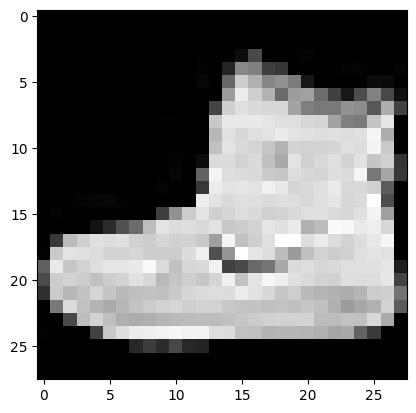

In [5]:
# Xem ảnh mặc định
plt.imshow(img, cmap="gray")

### Xây dựng Convolution Layer - Example

In [6]:
# Khởi tạo lớp convolution
conv_layer = tf.keras.layers.Conv2D(
    filters=8,            # Sử dụng 8 bộ lọc
    kernel_size=(3, 3)   # Kernel kích thước 3x3 - là size của 1 cái sliding window
)

# Xây dựng lớp Conv2D
conv_layer.build(img_reshape.shape)
# Cho conv_layer biết là input đầu vào cho layer có shape như thế nào

In [8]:
# Đưa ảnh qua lớp Convolution
output_images = conv_layer(img_reshape)

# Chuyển đổi đầu ra về dạng numpy
output_images_np = output_images.numpy().squeeze()  # Loại bỏ batch dimension
# Squeeze: Loại bỏ các chiều có kích thước 1 khỏi 1 array hoặc data frame

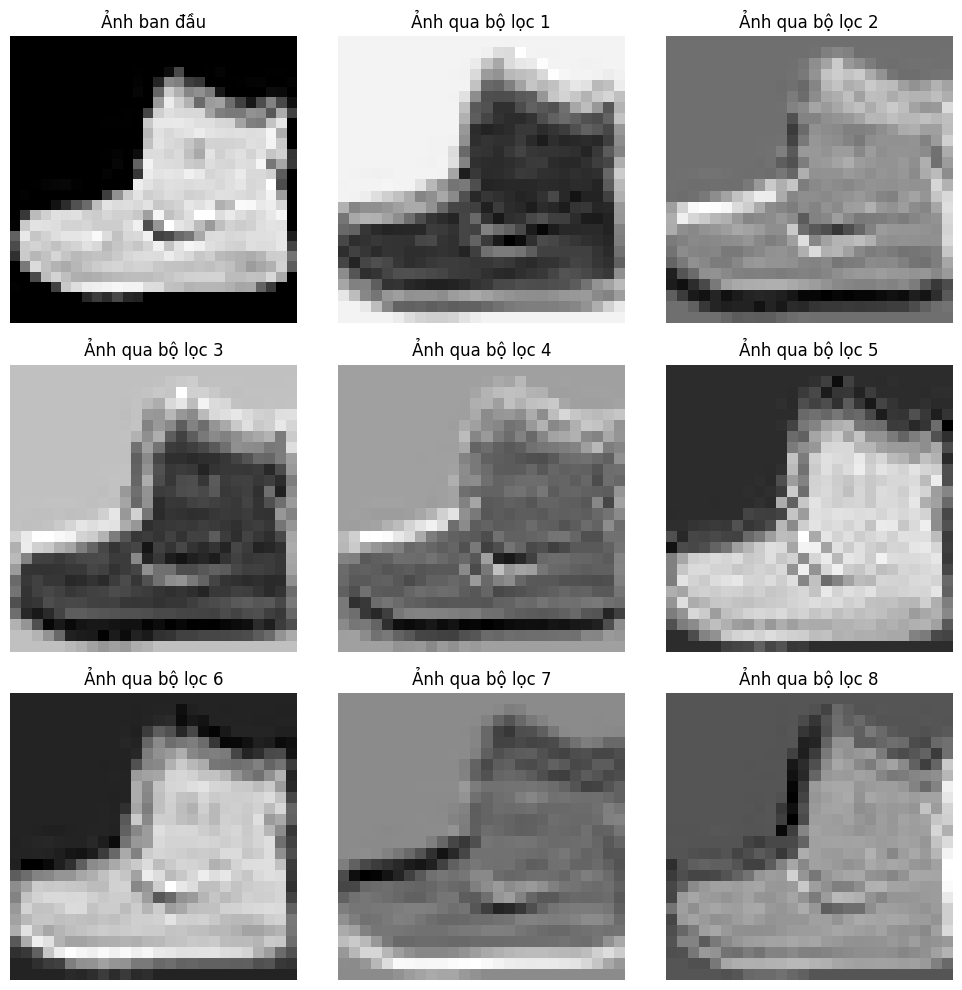

In [10]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))
axs = axs.flatten()

# Hiển thị ảnh gốc
axs[0].imshow(img, cmap="gray")
axs[0].axis("off")
axs[0].set_title("Ảnh ban đầu")

# Hiển thị ảnh đã qua lớp tích chập
for i in range(8):
    axs[i+1].imshow(output_images_np[..., i], cmap="gray") # viết ... đoạn đầu tức là show hết những dimensions đó
    axs[i+1].axis("off")
    axs[i+1].set_title(f"Ảnh qua bộ lọc {i+1}")

plt.tight_layout()
plt.show()

In [11]:
print("Kích thước ảnh sau khi qua lớp tích chập: ", output_images_np[..., i].shape)

Kích thước ảnh sau khi qua lớp tích chập:  (26, 26)


Như mọi người thấy, bức ảnh sau khi qua lớp tích chập có 8 bộ lọc, sinh ra 8 bức ảnh khác nhau, từ đó mô hình có thể học được nhiều khía cạnh, đặc trưng khác nhau của hình ảnh ban đầu.

Mọi người tinh mắt có thể nhận thấy, kích thước đầu vào của ảnh là **(28 x 28)** nhưng sau khi qua **lớp tích chập** thì kích thước chỉ còn **(26 x 26)**. Điều này diễn ra là vì khi trải qua **bộ lọc (3 x 3)** thì phần viền hình ảnh sẽ thụt lùi vô để gộp với nhân của bộ lọc. Nói vậy khá khó hỉu nên mình sẽ lấy một hình ảnh làm ví dụ.

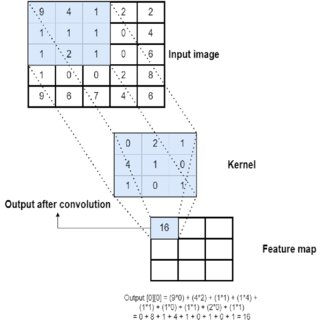

Sau khi phần **cửa sổ (3 x 3)** trượt trên hình ảnh gốc và cắt một phần ra, nhân với **bộ lọc (kernel 3 x 3)**, thì chúng tổng hợp lại còn 1 ô giá trị là 16, tương ứng với vị trí trung tâm (số 1) ở giữa của cửa sổ và bộ lọc. Do đó, phần viền ảnh bên trái, phải, trên, và dưới đều bị cắt đi.

Một ảnh có kích thước **A x B** sau khi qua lớp tích chập cơ bản thông thường sẽ có kích thước đầu ra là **(A-2) x (B-2)**.

> **Vậy có cách nào đảm bảo ảnh khi qua lớp tích chập có thể giữ nguyên kích thước không?**

Tất nhiên là có! Bạn chỉ cần thêm **padding** vào ảnh. Hiểu đơn giản, **padding** là số ô mà mình thêm vào phần viền xung quanh ảnh để mở rộng kích thước trước khi áp dụng bộ lọc. Như trong ví dụ minh họa, phần đệm (padding) thêm vào là 1 ô xung quanh ảnh.

![Image about padding.gift Nếu các bạn không thấy ảnh gift thì chắc medium bị chặn, các bạn có thể bật 1.1.1.1 lên nha](https://miro.medium.com/v2/resize:fit:640/format:webp/1*1okwhewf5KCtIPaFib4XaA.gif)

Phần màu xanh lam đại diện cho **ảnh gốc** kích thước 5 x 5.

Phần xám quét qua là **cửa sổ trượt** với kích thước 3 x 3. (Chú thích: cửa sổ trượt là phần sẽ quét qua tấm ảnh và nhân các giá trị trong đó với bộ lọc). Như trong hình, phần xám đó chính là nơi **áp bộ lọc (kernel)** lên.

Phần xanh lá chính là **ảnh đầu ra** sau khi đã qua bộ lọc.

Khi bộ lọc hay cửa sổ trượt quét qua ảnh đã được thêm **padding**, ô pixel trung tâm của bộ lọc có thể nhìn thấy được viền của ảnh gốc, từ đó giúp thu lại được phần viền của ảnh và giữ cho ảnh đầu ra có kích thước **tương đương với ảnh gốc**.

### Công thức thêm padding để giữ lại kích thước ảnh ban đầu:
> **padding = (kernel_size - 1) / 2**

Tức là kernel_size càng lớn thì phần viền bị nó bỏ qua càng nhiều

Trong đó, **kernel_size** là kích thước bộ lọc.

*Lưu ý*: Kích thước của bộ lọc nên luôn là **số lẻ** (ví dụ: 3 x 3, 5 x 5,...). Điều này giúp dễ dàng hơn trong việc tính toán và định vị pixel trung tâm của bộ lọc.

---------------------------------------------------------------------------

Ngoài ra, **lớp tích chập** còn có thêm một tham số quan trọng nữa là **bước nhảy (stride)**. Bạn chỉ cần hiểu đơn giản, **bước nhảy** chính là **số ô mà cửa sổ trượt hay bộ lọc (kernel) nhích qua mỗi lần di chuyển**. Trong ví dụ trên, bước nhảy là **1**.

### Ứng dụng của tham số bước nhảy là gì?

Không phải lúc nào việc đi chậm như vậy hay để bước nhảy là 1 (mặc định) cũng tối ưu. Đối với các bức ảnh lớn, số lượng tính toán sẽ rất lớn, dẫn đến **tốn nhiều thời gian**. Hơn nữa, việc phân tích quá chi tiết một bức ảnh đôi khi sẽ **không học được các đặc trưng tổng quát** hoặc dẫn đến tình trạng **quá khớp (overfitting)**.

Lúc này, ta có thể tăng số lượng bước nhảy lên, ví dụ **2** hoặc lớn hơn. Điều này giúp bộ lọc di chuyển nhanh hơn và kích thước đầu ra giảm xuống.

### Tưởng tượng như sau:
- Nếu bạn bước đi từng nấc cầu thang (stride = 1), bạn cần **16 bước** để lên hết cầu thang.
- Nhưng nếu bạn bước cùng lúc **2 nấc** (stride = 2), bạn chỉ cần **8 bước**.

Tương tự, khi tăng **bước nhảy (stride)**, bộ lọc sẽ di chuyển nhanh hơn, giúp giảm kích thước đầu ra và **giảm thiểu thời gian** cũng như **lượng phép toán cần xử lý**.

Ví dụ, nếu áp dụng bước nhảy là **2**, kích thước ảnh đầu ra sẽ bị giảm đi một nửa so với khi sử dụng bước nhảy là **1**.

### Tổng kết lại những tham số bạn cần phải nhớ trong lớp tích chập:
1. **Kích thước bộ lọc (kernel size)**: Quy định kích thước của bộ lọc (ví dụ: 3x3, 5x5,...) dùng để trích xuất đặc trưng từ ảnh.
2. **Tham số về phần đệm (padding)**: Giúp bảo toàn kích thước ảnh đầu ra bằng cách thêm các giá trị vào viền ảnh gốc.
3. **Tham số về bước nhảy (stride)**: Quy định số ô mà cửa sổ trượt di chuyển mỗi lần, ảnh hưởng đến kích thước đầu ra và tốc độ tính toán.

### Các chỉ số có thể bạn sẽ muốn tìm hiểu thêm:
- **Độ giãn nở (dilation rate)**: Quy định khoảng cách giữa các phần tử trong bộ lọc, giúp mở rộng vùng nhận biết mà không làm tăng số lượng tham số.

# Pooling

Cái Pooling này là để chỉ giữ lại phần quan trọng của giữ liệu

**Lớp gộp (pooling layer)** có ý tưởng tương tự như lớp tích chập (convolution layer). Chúng cũng sử dụng một bộ lọc để quét qua hình ảnh và tổng hợp giá trị lại, cũng có kích thước bộ lọc và bước nhảy. Tuy nhiên, cách thức tổng hợp giá trị lại khác biệt:

- **Lớp tích chập (convolution layer)**: Nhân bộ lọc với phần được quét từ cửa sổ trượt trên ảnh để trích xuất đặc trưng.
- **Lớp gộp (pooling layer)**: Sử dụng các phép toán đơn giản như:
  - Tìm giá trị lớn nhất (**Max pooling**).
  - Tính trung bình các giá trị (**Average pooling**).

### Điểm khác biệt chính:
- **Lớp gộp (pooling layer)** không được coi là một lớp có khả năng học, vì mục tiêu của nó chỉ là tổng hợp giá trị, không sinh ra tham số học như lớp tích chập.
- Ngược lại, **lớp tích chập (convolution layer)** được coi là lớp có khả năng học, vì nó học các đặc trưng từ ảnh thông qua quá trình tối ưu hóa trọng số của bộ lọc.

### Lưu ý:
- **Bước nhảy (stride)** của lớp gộp thường được chọn bằng với kích thước cửa sổ quét của nó, điều này giúp giảm độ phức tạp tính toán một cách hiệu quả.

### Hai phương pháp gộp (pooling) phổ biến:
1. **Gộp theo giá trị lớn nhất (Max pooling)**: Chọn giá trị lớn nhất trong cửa sổ.
2. **Gộp theo trung bình cộng các giá trị (Average pooling)**: Tính trung bình các giá trị trong cửa sổ.

Để dễ hiểu hơn, mình sẽ thêm hai ví dụ minh họa bên dưới.

Gộp theo giá trị lớn nhất **(Max pooling)**.

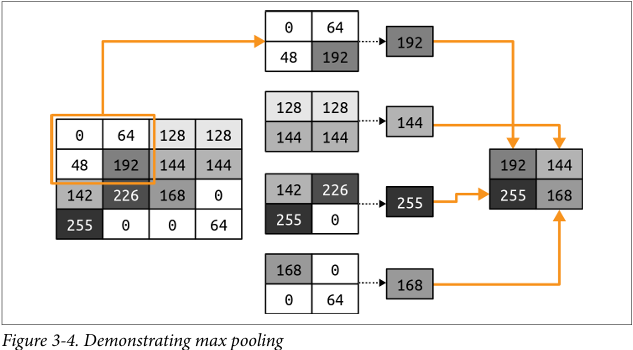

Như các bạn thấy, phần **cửa sổ trượt** hay **bộ lọc màu đỏ** đã quét qua hình ảnh và lấy ra **giá trị lớn nhất** trong mỗi nhóm giá trị.

Từ đó, kích thước của tấm ảnh từ **4 x 4** đã giảm xuống còn **2 x 2** (với bước nhảy stride = 2).

Điều này minh họa cách **Max pooling** giúp giảm kích thước ảnh trong khi vẫn giữ lại các đặc trưng quan trọng nhất.

Bây giờ chúng ta đến với lớp gộp trung bình cộng **(Average pooling)**.
![Average pooling](https://raw.githubusercontent.com/valoxe/image-storage-1/master/blog-deep-learning/cnnumpy-naive/5-a.gif)

## Quan sát dữ liệu sau khi đi qua layer Pooling

In [12]:
from tensorflow.keras.layers import MaxPooling2D, AveragePooling2D

# Khởi tạo lớp gộp giá trị lớn nhất (Max pooling)
max_pool = MaxPooling2D(pool_size=(2, 2))
max_pool.build(img_reshape.shape)

# Cho ảnh qua lớp max pooling
img_max_pool = max_pool(img_reshape)
print("Kích thước ảnh sau khi qua lớp gộp giá trị lớn nhất: ",img_max_pool.shape)

# Khởi tạo lớp gộp trung bình cộng (Average pooling)
avg_pool = AveragePooling2D(pool_size=(2, 2))
avg_pool.build(img_reshape.shape)

# Cho ảnh qua lớp gộp trung bình cộng
img_avg_pool = avg_pool(img_reshape)
print("Kích thước ảnh sau khi qua lớp gộp trung bình cộng: ",img_avg_pool.shape)

Kích thước ảnh sau khi qua lớp gộp giá trị lớn nhất:  (1, 14, 14, 1)
Kích thước ảnh sau khi qua lớp gộp trung bình cộng:  (1, 14, 14, 1)


Có thể thấy dữ liệu đã bị giảm đi 1 nửa từ 28 xuống 14 ở cả 2 chiều

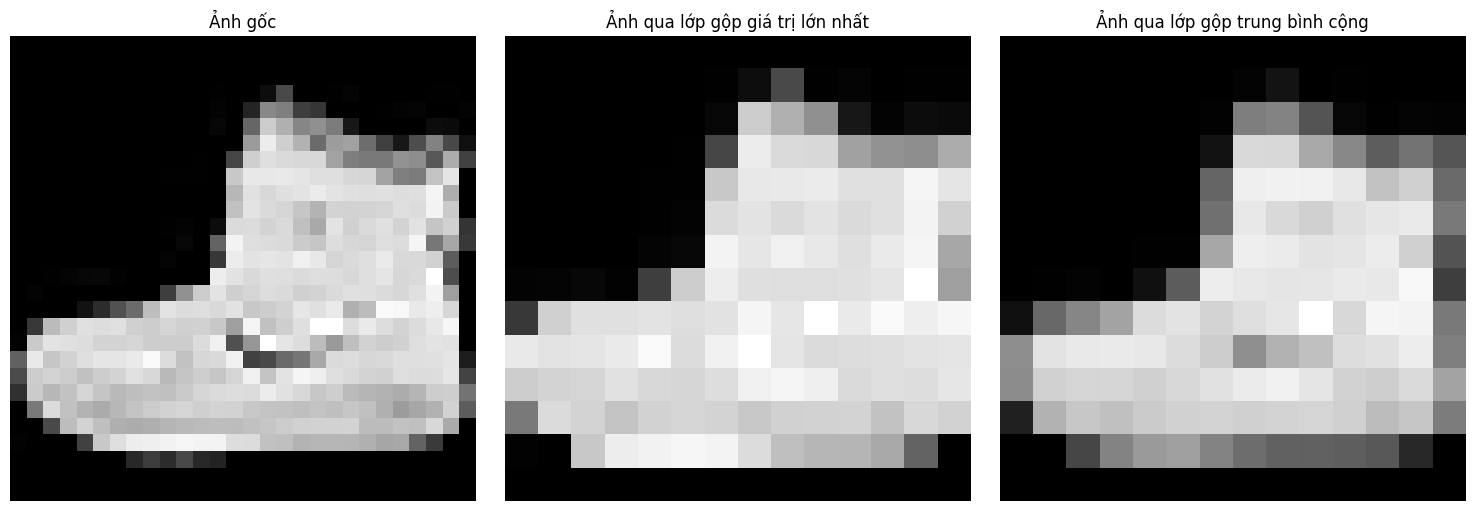

In [13]:
# Chuyển đổi đầu ra về dạng numpy
# Loại bỏ batch dimension
img_max_pool = img_max_pool.numpy().squeeze()
img_avg_pool = img_avg_pool.numpy().squeeze()

# Hiển thị hình ảnh
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs = axs.flatten()

# Ảnh gốc
axs[0].imshow(img_reshape.squeeze(), cmap='gray')
axs[0].set_title('Ảnh gốc')
axs[0].axis('off')

# Ảnh qua lớp gộp giá trị lớn nhất (max pooling)
axs[1].imshow(img_max_pool, cmap='gray')
axs[1].set_title('Ảnh qua lớp gộp giá trị lớn nhất')
axs[1].axis('off')

# Ảnh qua lớp gộp trung bình cộng (average pooling
axs[2].imshow(img_avg_pool, cmap='gray')
axs[2].set_title('Ảnh qua lớp gộp trung bình cộng')
axs[2].axis('off')

plt.tight_layout()
plt.show()

## Tổng kết lại về lớp gộp (pooling layer):

- **Không phải là một lớp có khả năng học**: Không có tham số học, chỉ thực hiện tổng hợp giá trị.
- **Mục tiêu**: Giảm số lượng tính toán bằng cách giảm kích thước đầu ra, nhưng vẫn giữ lại các đặc trưng quan trọng của hình ảnh.
- **Các lớp gộp phổ biến**:
  - **Max pooling**: Lấy giá trị lớn nhất trong cửa sổ.
  - **Average pooling**: Tính trung bình giá trị trong cửa sổ.

Ngoài ra, mọi người cũng có thể tìm hiểu thêm các phương pháp gộp khác như:
- **Min pooling**: Lấy giá trị nhỏ nhất.
- **Global pooling**: Tính toán trên toàn bộ ảnh (thường dùng trong global average pooling hay global max pooling).
- **Mixed pooling**: Kết hợp cả max pooling và average pooling.

Sử dụng kết hợp Convolution Layer với Pooling Layer: When combined with pooling, we can reduce the amount of information in the image
 while maintaining the features.

# Xây dựng mô hình sử dụng Convolution Layers - CNN
 To convert this to a convolutional neural network, we simply use convolutional layers
 in our model definition. We’ll also add pooling layers.


Tiếp tục áp dụng trên bài toán phân loại đồ dạc dựa trên bộ dữ liệu Fashion MNIST

In [14]:
# Kiểm tra kích thước tập dữ liệu huấn luyện (train) và tập dữ liệu kiểm tra (test)
print("Kích thước tập dữ liệu huấn luyện (train): ",train_imgs.shape)
print("Kích thước tập dữ liệu kiểm tra (test): ",test_imgs.shape)

Kích thước tập dữ liệu huấn luyện (train):  (60000, 28, 28)
Kích thước tập dữ liệu kiểm tra (test):  (10000, 28, 28)


Định dạng lại chiều của dữ liệu để dùng được Convolution Layer

In [15]:
# Vì bộ dữ liệu của chúng ta hiện tại chỉ đơn giản có kích thước là (số lượng mẫu x chiều cao x chiều rộng)
# Chúng chưa có kích thước về số kênh màu của ảnh nên chúng ta cần định dạng lại.
# Với ảnh trắng đen thì số kênh màu là 1 còn ảnh màu RGB thì sẽ là 3.
train_imgs = train_imgs.reshape(60000, 28, 28, 1)
test_imgs = test_imgs.reshape(10000, 28, 28, 1)

print("Kích thước tập dữ liệu huấn luyện (train) sau khi định dạng: ", train_imgs.shape)
print("Kích thước tập dữ liệu kiểm tra (test) sau khi định dạng: ", test_imgs.shape)

Kích thước tập dữ liệu huấn luyện (train) sau khi định dạng:  (60000, 28, 28, 1)
Kích thước tập dữ liệu kiểm tra (test) sau khi định dạng:  (10000, 28, 28, 1)


In [16]:
# Data Normalization.
train_imgs = train_imgs / 255.0
test_imgs = test_imgs / 255.0

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Khởi tạo kiến trúc mô hình sử dụng các lớp tích chập (convolution)
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)), # Lớp tích chập với 64 bộ lọc kích thước 3 x 3
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Định nghĩa hàm tối ưu và hàm mất mát
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


- Nếu input là RBG thì mở rộng lên 3 ở chiều thứ 3 của input_shape
- Layer đầu tiên trong network mới cần định nghĩa input_shape thôi
- The data also had to be reshaped accordingly. 28 × 28 is
 the number of pixels in the image, and 1 is the number of color channels. You’ll typi
cally find that this is 1 for a grayscale image or 3 for a color image, where there are
 three channels (red, green, and blue), with the number indicating the intensity of that
 color
-  Also note that in the original deep neural network (DNN) we ran the input through a
 Flatten layer prior to feeding it into the first Dense layer. We’ve lost that in the input
 layer here—instead, we just specify the input shape. Note that prior to the Dense layer,
 after convolutions and pooling, the data will be flattened.  
 > *Sau khi chạy qua Convolution và Pooling Layer data will be flattened*

In [18]:
# Huấn luyện mô hình, thời gian huấn luyện của mô hình này sẽ lâu hơn rất nhiều so với mô hình trước đó
# bởi số lượng tham số sinh ra từ các bộ lọc của lớp tích chập đã rất lớn
model.fit(train_imgs, train_labels, epochs=30)

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7732 - loss: 0.6189
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8882 - loss: 0.3112
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9064 - loss: 0.2605
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9172 - loss: 0.2199
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9280 - loss: 0.1926
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9375 - loss: 0.1700
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9424 - loss: 0.1538
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9510 - loss: 0.1313
Epoch 9/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9558 - loss: 0.1163
Epoch 10/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9620 - loss: 0.1014
Epoch 11/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9677 - loss: 0.0868
Epoch 12/30
1875/1875 ━━━━━━━━

Như mọi người có thể thấy thì mô hình ngay từ epoch 27, 28 đã có thể đạt được độ chính xác trên tập huấn luyện lên đến hơn 99%. Đây thật sự là một con số vô cùng ấn tượng so với mô hình chỉ dựa vào các lớp tuyến tính trước đó.

In [19]:
# Đánh giá mô hình
eval = model.evaluate(test_imgs, test_labels)
print("Độ mất mát trên tập kiểm tra: ", eval[0])
print("Độ chính xác trên tập kiểm tra: ", eval[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9082 - loss: 0.7271
Độ mất mát trên tập kiểm tra:  0.7225375771522522
Độ chính xác trên tập kiểm tra:  0.9093999862670898


Độ chính xác trên tập kiểm tra cũng đã có thể đạt được trên 90%, cao hơn rất là nhiều.

Để phân tích rõ hơn về đầu ra giữa các lớp trong mô hình mọi người có thể in ra bảng thống kê của mô hình như sau.

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 731,360 (2.79 MB)

 Trainable params: 243,786 (952.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 487,574 (1.86 MB)

- Sau lớp Convolution đầu tiên, (3x3) filter làm cho (28x28) image giảm xuống thành (26x26) image
- After that the pooling layer is 2 × 2, so the size of the image will halve on each axis,
 and it will then become (13 × 13). The next convolutional layer will reduce this fur
ther to 11 × 11, and the next pooling, rounding down, will make the image 5 × 5.

 So, by the time the image has gone through two convolutional layers, the result will
 be many 5 × 5 images. How many? We can see that in the Param # (parameters)
 column

> Trong sách có phần tính toán cái số parameter này, nếu cần thì tìm hiểu sau

Trong bảng trên, **Param** đại diện cho số lượng tham số học được trong các lớp, tức là số lượng phép tính toán phải thực hiện. Con số này càng lớn có thể cho thấy mô hình càng sâu và phức tạp. Tuy nhiên, điều này không đảm bảo rằng mô hình sẽ tốt hơn.

Mọi người có thể thấy, như mình từng nói, **lớp gộp (pooling)** chỉ có tác dụng tổng hợp và giữ lại các đặc trưng quan trọng, vì vậy **không có tham số học**. Ngược lại, các lớp như **tích chập (convolution)** hay **tuyến tính (dense)** có tham số học, vì trong quá trình huấn luyện, chúng được cập nhật trọng số và bộ lọc, do đó có khả năng học tập.

### Phân tích kích thước đầu ra giữa các lớp:

1. **Kích thước ban đầu**: Ảnh của chúng ta có kích thước **28 x 28**.

2. **Qua lớp tích chập đầu tiên**: Nếu không thêm padding, kích thước bị trừ đi phần viền do kernel size, còn lại **26 x 26**.

3. **Qua lớp gộp đầu tiên (2 x 2)**: Kích thước ảnh giảm đi một nửa, còn lại **13 x 13**.

4. **Qua lớp tích chập và lớp gộp thứ hai**:
   - Sau lớp tích chập thứ hai: Kích thước giảm xuống **11 x 11** (nếu không thêm padding).
   - Sau lớp gộp thứ hai (2 x 2): Kích thước giảm tiếp, còn **5 x 5**.

  > **Với trường hợp kích thước ảnh là số lẻ mà lớp gộp là số chẵn, lớp gộp giải quyết thế nào?**

  Câu trả lời là: **Lớp gộp sẽ bỏ đi hàng và cột cuối** để phù hợp với kích thước của cửa sổ gộp, do đó kết quả cuối cùng là **10 / 2 = 5**.

5. **Trải phẳng dữ liệu**:
   - Ở bước cuối, ta có ảnh kích thước **5 x 5**, và do có **64 bộ lọc**, tổng lượng dữ liệu là **5 x 5 x 64 = 1600**.
   - So với cách trải phẳng thông thường (28 x 28 = 784 dữ liệu), lượng dữ liệu được trích xuất để học tập, phân biệt đã tăng đáng kể.

---

### Kết luận:
Từ một bức ảnh ban đầu kích thước **28 x 28**, ta thu được **1600 dữ liệu** để đưa vào lớp tuyến tính thay vì chỉ có **784 dữ liệu** khi trải phẳng thông thường. Điều này giúp lượng dữ liệu học tập tăng lên đáng kể, cải thiện khả năng học đặc trưng và hiệu quả của mô hình.

Nói chung là dùng Convolution để dùng nhiều filter nhân thêm nhiều dữ liệu với các feature khác nhau, sau đó dùng pooling để giảm bớt đi tuy nhiên kết quả cuối cùng nhận được vẫn là nhiều data hơn và đa dạng hơn